# Introduction to neural networks

We are now well equiped to start experimenting with neural networks.

Necessary ingredients to train a neural network are:
    * model
    * loss
    * optimizer
    
We will focus on the model part today, and the goal is to:

1. Get a basic intuition of what individual neurons and layers can achieve
2. Understand overfitting and generalization from stability perspective

** Please save your answers as inline comments in the appropriate cell. **

In [226]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

# Interpreting neurons

Read https://distill.pub/2018/building-blocks/, until "Making Things Human-Scale" (i.e. without). 

Exam might include a question about this paper.

# Ex. 1: Understanding role of neurons

Using http://playground.tensorflow.org, answer the following questionsa:

* (a) What is the smallest number of neurons that can achieve <0.2 loss on the XOR dataset?
* (b) What do the neurons implement?

Notes: 

* you might need to restart training few times
* you cannot change features (except for (d)), nor dataset noise/size

(a) Three neurons.

(b) The neurons implement: 
* $(x,y)\mapsto \{x>0\}$ 
* $(x,y)\mapsto \{y>0\}$
* $(x,y)\mapsto \{x+y>0\}$

# Ex. 2: Understanding overfitting

Using Spiral dataset on http://playground.tensorflow.org, answer in the notebook the following questions:

Tasks: 

* (a) Achieve (stable) <0.1 test loss, note down the architecture/optimizer/regularizer used
* (b) Achieve (stable) <0.05 test loss, note down the architecture/optimizer/regularizer used
* (c) Visually, what distinguishes well generalizing solution from one that overfits? 
* (d) Which feature combination (you can pick them in the playground) improves most your best configuration?

Notes:

* you can use "show test data" to understand why train and test loss differ.
* you cannot change features (except for (d)), nor dataset noise/size

Hints:

* first try to ovefit (i.e. achieve very low train loss)
    * use ReLU, which optimizes better
* then, try to regularize the overfitting solution

  2 layers, 8 and 6 neurons
  The well-generalizing solution will be less "jagged".
  The sines are most useful (I expect change to polar coordinates would be even more useful).

# Ex. 3 (XOR)

1. (a) Solve XOR using PyTorch 
2. (b) Does freezing weights from input to first hidden layer still allow you to solve the ask?
3. (c) Is it easier or harder to solve the task using SGD vs RMSProp optimizer?

Hint: you can base your solution off the previous notebooks. 

Notes: 

For the solution to be accepted, it must:

1. Include plot of the training data and model prediction heatmap
2. Use only single hidden layer.
3. Use maximally 3 hidden neurons (except for (b)).

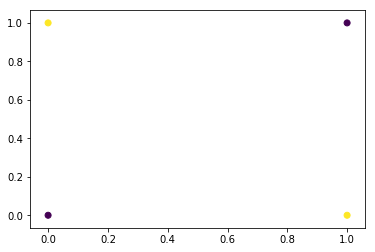

In [37]:
## Data

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1,))

## (a)

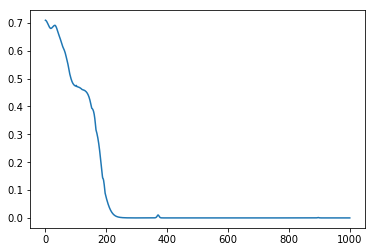

In [168]:
import torch
import torch.nn.functional as F
from torch import nn
from torch.autograd import Variable
import torch.optim as optim

net = nn.Sequential()
net.add_module('W0', nn.Linear(2, 3))
net.add_module('relu', nn.ReLU())
net.add_module('W1', nn.Linear(3, 2))

X_ = Variable(torch.FloatTensor(X))
y_ = Variable(torch.LongTensor([0,1,1,0]))

optimizer = optim.SGD(net.parameters(), lr=0.01)

criterion = nn.CrossEntropyLoss()

losses = []

for i in range(1000):
    y_pred = net(X_)
    loss = criterion(y_pred, y_)
    loss.backward()
    optimizer.step()
    losses.append(loss.data)
    #if i % 100 == 0:
    #    print(loss.data)
    
plt.plot(losses)

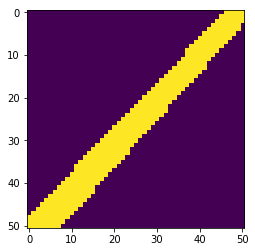

In [172]:
xs = np.linspace(0, 1, 51)
ys = np.linspace(0, 1, 51)
zs = np.zeros((51, 51))

for ix in range(xs.shape[0]):
    for iy in range(ys.shape[0]):
        inp = Variable(torch.unsqueeze(torch.FloatTensor([xs[ix], ys[iy]]), 0))
        zs[ix, iy] = np.argmax(net(inp).data)
        
plt.imshow(zs)

## (c) looks easier

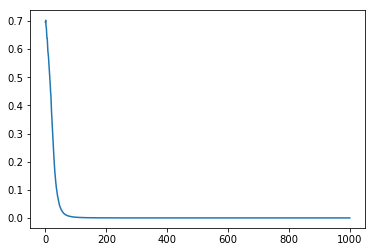

In [181]:
net = nn.Sequential()
net.add_module('W0', nn.Linear(2, 3))
net.add_module('relu', nn.ReLU())
net.add_module('W1', nn.Linear(3, 2))

X_ = Variable(torch.FloatTensor(X))
y_ = Variable(torch.LongTensor([0,1,1,0]))


optimizer = optim.RMSprop(net.parameters(), lr=0.01)

losses = []

for i in range(1000):
    y_pred = net(X_)
    loss = criterion(y_pred, y_)
    loss.backward()
    optimizer.step()
    losses.append(loss.data)
    
plt.plot(losses)

## (b) yes

[Parameter containing:
 0.5637  0.1893
 0.3825 -0.6582
 0.5532  0.5294
[torch.FloatTensor of size 3x2]
, Parameter containing:
1.00000e-02 *
 -6.7144
 -4.5284
 -8.0677
[torch.FloatTensor of size 3]
]
[Parameter containing:
 0.5637  0.1893
 0.3825 -0.6582
 0.5532  0.5294
[torch.FloatTensor of size 3x2]
, Parameter containing:
1.00000e-02 *
 -6.7144
 -4.5284
 -8.0677
[torch.FloatTensor of size 3]
]


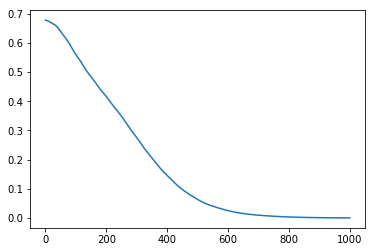

In [229]:
net = nn.Sequential()
net.add_module('W0', nn.Linear(2, 3))
net.add_module('relu', nn.ReLU())
net.add_module('W1', nn.Linear(3, 2))

for p in net.W0.parameters():
    p.requires_grad = False

X_ = Variable(torch.FloatTensor(X))
y_ = Variable(torch.LongTensor([0,1,1,0]))


optimizer = optim.SGD((p for p in net.parameters() if p.requires_grad), lr=0.01)

losses = []

print(list(net.W0.parameters()))

for i in range(1000):
    y_pred = net(X_)
    loss = criterion(y_pred, y_)
    loss.backward()
    optimizer.step()
    losses.append(loss.data)
    
print(list(net.W0.parameters()))
plt.plot(losses)

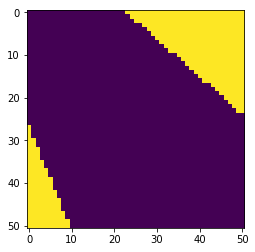

In [230]:
xs = np.linspace(0, 1, 51)
ys = np.linspace(0, 1, 51)
zs = np.zeros((51, 51))

for ix in range(xs.shape[0]):
    for iy in range(ys.shape[0]):
        inp = Variable(torch.unsqueeze(torch.FloatTensor([xs[ix], ys[iy]]), 0))
        zs[ix, iy] = np.argmax(net(inp).data)
        
plt.imshow(zs)